In [1]:
from high_level_tdc import *
from time import sleep
from matplotlib import pyplot as plt
import numpy as np

/home/pi/kilom_spi/high_level_tdc.py:14: RuntimeWarning: This channel is already in use, continuing anyway.  Use GPIO.setwarnings(False) to disable warnings.
  GPIO.setup(2, GPIO.OUT)


In [2]:
trig_enable_chan(0)
disable_calib_pulser()
#enable_calib_pulser()

print(read_scaler(0))
for i in range(0,2):
  print(scaler_rate(i,delay=0.1))

[1391, 555477]
2071.7831423149278
2071.7831423149278


In [3]:
arm()
print(get_trig_state())
trigger()
print(get_trig_state())
arm()
print(get_trig_state())
trigger()
print(get_trig_state())
arm()


0
1
0
1


In [4]:
arm()
trig_enable_chan(0)
#trigger()

In [4]:
wait_for_trig(timeout=0.3)
get_trig_state()

0

In [38]:
arm()
sleep(0.002)
trigger()
sleep(0.002)
print("tot: {:3.3f} ns".format(read_tot(0)*1e9))
print("pre-tot: {:3.3f} ns".format(read_pre_tot(0)*1e9))

tot: 4.167 ns
pre-tot: 4.167 ns


In [138]:
disable_calib_pulser()
#enable_calib_pulser()

arm()
sleep(0.002)
trigger()
sleep(0.002)
print(read_pre_tdc_chan(0))
print(read_pre_tdc_chan(1))
print(read_tdc_chan(0))
print(read_tdc_chan(1))

print(read_tot(0))
print(read_pre_tot(0))
print(read_tot(1))
print(read_pre_tot(1))

0.039125825833333336
0.03912587541666667
0.03961260416666667
0.03961265416666667
5.000000000143778e-08
4.958333333499043e-08
4.8333333335648376e-08
4.8333333335648376e-08


ta pre  (ns) 8480279.167
tb pre  (ns) 7995664.583
ta post (ns) 8964774.583
tb post (ns) 8480282.917

ta pre  (ns) 13806851.667
tb pre  (ns) 13322540.833
ta post (ns) 14290776.250
tb post (ns) 13806855.417

ta pre  (ns) 20100948.333
tb pre  (ns) 20100952.083
ta post (ns) 20584995.000
tb post (ns) 20584998.750

ta pre  (ns) 27362617.917
tb pre  (ns) 27362622.083
ta post (ns) 27846887.083
tb post (ns) 27846890.833

ta pre  (ns) 34141152.083
tb pre  (ns) 33657310.417
ta post (ns) 34625228.333
tb post (ns) 34141155.833



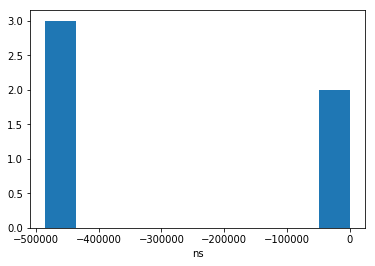

In [5]:

tdiff =  []

disable_calib_pulser()
#enable_calib_pulser()

# triggering pulse is stored in post register

a = 0
b = 1

trig_chan = b

trig_enable_chan(0)
trig_enable_chan(1<<trig_chan)

for i in range(0,5):
  arm()
  sleep(0.002)
  #trigger()
  sleep(0.002)
  tapre = read_pre_t1(a)
  tbpre = read_pre_t1(b)
  tapost = read_t1(a)
  tbpost = read_t1(b)
  print("ta pre  (ns) {:3.3f}".format(tapre*1e9))
  print("tb pre  (ns) {:3.3f}".format(tbpre*1e9))
  print("ta post (ns) {:3.3f}".format(tapost*1e9))
  print("tb post (ns) {:3.3f}".format(tbpost*1e9))
  print()

  tdiff += [tbpre-tapre]

tdiff = np.array(tdiff)

plt.hist(tdiff*1e9)
plt.xlabel("ns")
plt.show()